In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import re


In [3]:
data_semarang_1 = pd.read_excel('./data_bencana_semarang/DATA_BENCANA_2018.xlsx', header=4)
data_semarang_2 = pd.read_excel('./data_bencana_semarang/DATA_BENCANA_2019.xlsx', header=4)
data_semarang_3 = pd.read_excel('./data_bencana_semarang/DATA_BENCANA_2020.xlsx', header=5)
data_semarang_4 = pd.read_excel('./data_bencana_semarang/DATA_BENCANA_2021.xlsx')
data_semarang_5 = pd.read_excel('./data_bencana_semarang/DATA_BENCANA_2022.xlsx')
data_semarang_6= pd.read_excel('./data_bencana_semarang/DATA_BENCANA_2023.xlsx')


In [20]:
data_semarang_2

,NO.,TGL. KEJADIAN,LOKASI,KELURAHAN,KECAMATAN,B,RB,TL,PB,RR,KB,PT,MD,Luka2,HLG,KERUGIAN,KETERANGAN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BULAN JANUARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01 00:00:00,RT. 03 RW. 01,Bendan Dhuwur,Gajahmungkur,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Korban Jiwa : Nihil,"Pada mlm tahun baru 31/12/2018, hujan deras di..."
2,NaN,NaN,Jln. Pawiyatan Luhur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Materiil :,"Bendan Dhuwur menyebabkan bbrp pohon tumbang, dan"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,- Atap rumah ambrol,diantaranya ada yg menimpa rumah salah satu wa...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yaitu rumah Bpk Irgo Wahyu. Akibatnya atap rumah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,39,30/12/2019,RT 01 RW IV,Trimulyo,Genuk,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,Korban jiwa : NIHIL,"Senin, 30 Desember 2019 sekitar pukul 04.30 WI..."
2302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kerusakan berupa rumah seisinya, 1 buah motor,...",NaN
2303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rumah milik Bapak Abdul Mufid,NaN
2304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data_bmkg_2018_januari = pd.read_excel('./Data Cuaca Harian BMKG/Data 2018/Januari.xlsx', header=8)
data_bmkg_2018_februari = pd.read_excel('./Data Cuaca Harian BMKG/Data 2018/Februari.xlsx', header=8)
data_bmkg_2018_maret = pd.read_excel('./Data Cuaca Harian BMKG/Data 2018/Maret.xlsx', header=8)
data_bmkg_2018_april = pd.read_excel('./Data Cuaca Harian BMKG/Data 2018/April.xlsx', header=8)
data_bmkg_2018_mei = pd.read_excel('./Data Cuaca Harian BMKG/Data 2018/Mei.xlsx', header=8)
data_bmkg_2018_juni = pd.read_excel('./Data Cuaca Harian BMKG/Data 2018/Juni.xlsx', header=8)
data_bmkg_2018_juli = pd.read_excel('./Data Cuaca Harian BMKG/Data 2018/Juli.xlsx', header=8)
data_bmkg_2018_agustus = pd.read_excel('./Data Cuaca Harian BMKG/Data 2018/Agustus.xlsx', header=8)
data_bmkg_2018_september = pd.read_excel('./Data Cuaca Harian BMKG/Data 2018/September.xlsx', header=8)
data_bmkg_2018_oktober = pd.read_excel('./Data Cuaca Harian BMKG/Data 2018/Oktober.xlsx', header=8)
data_bmkg_2018_november = pd.read_excel('./Data Cuaca Harian BMKG/Data 2018/November.xlsx', header=8)
data_bmkg_2018_desember = pd.read_excel('./Data Cuaca Harian BMKG/Data 2018/Desember.xlsx', header=8)

data_bmkg_2018 = pd.concat([data_bmkg_2018_januari, data_bmkg_2018_februari, data_bmkg_2018_maret,
                               data_bmkg_2018_april, data_bmkg_2018_mei, data_bmkg_2018_juni,
                               data_bmkg_2018_juli, data_bmkg_2018_agustus, data_bmkg_2018_september,
                               data_bmkg_2018_oktober, data_bmkg_2018_november, data_bmkg_2018_desember])

data_bmkg_2018 = data_bmkg_2018.dropna(subset=['Tanggal'])
data_bmkg_2018 = data_bmkg_2018.dropna(subset=['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car'], how='all')


data_bmkg_2018['Tn'].fillna(round(data_bmkg_2018['Tn'].mean(), 1), inplace=True)
data_bmkg_2018['Tx'].fillna(round(data_bmkg_2018['Tx'].mean(), 1), inplace=True)
data_bmkg_2018['Tavg'].fillna(round(data_bmkg_2018['Tavg'].mean(), 1), inplace=True)
data_bmkg_2018['RH_avg'].fillna(round(data_bmkg_2018['RH_avg'].mean(), 1), inplace=True)
data_bmkg_2018['RR'].fillna(0, inplace=True)
data_bmkg_2018['RR'].replace(8888, 0, inplace=True)
data_bmkg_2018['ss'].fillna(0, inplace=True)

data_bmkg_2018['Tanggal'] = pd.to_datetime(data_bmkg_2018['Tanggal'], format='%d-%m-%Y')


data_bmkg_2018.to_csv('./data_bencana_semarang_clean/data_bmkg_2018.csv', index=False)

In [22]:
data_bmkg_2018.isna().sum()

Tanggal    0
Tn         0
Tx         0
Tavg       0
RH_avg     0
RR         0
ss         0
ff_x       0
ddd_x      0
ff_avg     0
ddd_car    0
dtype: int64

In [23]:
data_semarang_1

,NO,TGL KEJADIAN,LOKASI,KELURAHAN,KECAMATAN,B,RB,TL,PB,RR,KB,PT,MD,Luka2,Hilang,KERUGIAN,KETERANGAN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BULAN JANUARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2018-01-02 00:00:00,Walisongo No. 401 samping Prol Damri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,kebakaran PT. MATS CHARCOAL
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2018-01-03 00:00:00,Rt 05 Rw 05,Wonotingal,Candisari,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Talud longsor 10x20 m ada mobil yang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"R. AGUS HARMUNANTO, SH",NaN
1879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pembina Utama Muda,NaN


In [24]:
data_semarang_1.columns

Index(['NO', 'TGL KEJADIAN', 'LOKASI', 'KELURAHAN', 'KECAMATAN', 'B', 'RB',
       'TL', 'PB', 'RR', 'KB', 'PT', 'MD', 'Luka2', 'Hilang', 'KERUGIAN',
       'KETERANGAN'],
      dtype='object')

In [25]:
data_semarang_1['TGL KEJADIAN'].unique()

array([nan, datetime.datetime(2018, 1, 2, 0, 0),
       datetime.datetime(2018, 1, 3, 0, 0),
       datetime.datetime(2018, 1, 4, 0, 0),
       datetime.datetime(2018, 1, 7, 0, 0),
       datetime.datetime(2018, 1, 8, 0, 0),
       datetime.datetime(2018, 1, 10, 0, 0),
       datetime.datetime(2018, 1, 12, 0, 0),
       datetime.datetime(2018, 1, 13, 0, 0),
       datetime.datetime(2018, 1, 20, 0, 0),
       datetime.datetime(2018, 1, 22, 0, 0),
       datetime.datetime(2018, 1, 23, 0, 0),
       datetime.datetime(2018, 1, 27, 0, 0),
       datetime.datetime(2018, 1, 28, 0, 0),
       datetime.datetime(2018, 1, 29, 0, 0), '29 - 30 Januari 2018',
       datetime.datetime(2018, 1, 30, 0, 0), 'TANGGAL KEJADIAN',
       datetime.datetime(2018, 2, 1, 0, 0),
       datetime.datetime(2018, 2, 2, 0, 0),
       datetime.datetime(2018, 2, 4, 0, 0),
       datetime.datetime(2018, 2, 5, 0, 0),
       datetime.datetime(2018, 2, 6, 0, 0),
       datetime.datetime(2018, 2, 7, 0, 0),
       datetime.d

In [26]:
data_semarang_1.head()

,NO,TGL KEJADIAN,LOKASI,KELURAHAN,KECAMATAN,B,RB,TL,PB,RR,KB,PT,MD,Luka2,Hilang,KERUGIAN,KETERANGAN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BULAN JANUARI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2018-01-02 00:00:00,Walisongo No. 401 samping Prol Damri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,kebakaran PT. MATS CHARCOAL
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2018-01-03 00:00:00,Rt 05 Rw 05,Wonotingal,Candisari,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Talud longsor 10x20 m ada mobil yang


In [27]:
# # Merge Keterangan
# keterangan_temp = []
# index = 0

# for i, data in data_semarang_1.iterrows():
#     if pd.notnull(data['TGL KEJADIAN']):
#         index = i
#     if pd.notna(data['KETERANGAN']):
#         keterangan_temp.append(data['KETERANGAN'])
#     else:
#         data_semarang_1.at[index, 'KETERANGAN_FULL'] = ' '.join(keterangan_temp)
#         keterangan_temp = []


# drop_columns = ['NO', 'B', 'RB', 'TL', 'PB', 'RR', 'KB', 'PT', 'MD', 'Luka2', 'Hilang', 'KERUGIAN', 'KETERANGAN']
# data_semarang_1.drop(columns=drop_columns, inplace=True)
# data_semarang_1 = data_semarang_1.replace(r'^\s*$', np.nan, regex=True)
# data_semarang_1 = data_semarang_1.dropna()
# data_semarang_1 = data_semarang_1[~data_semarang_1['TGL KEJADIAN'].isin(['TANGGAL KEJADIAN', '01 - 17 Februari 2018', '01-05 Maret 2018', '14/04/2018'])]

drop_columns = ['NO', 'PB', 'RR', 'MD', 'Luka2', 'Hilang', 'KERUGIAN', 'KETERANGAN']
data_semarang_1.drop(columns=drop_columns, inplace=True)
data_semarang_1 = data_semarang_1.replace(r'^\s*$', np.nan, regex=True)
# data_semarang_1 = data_semarang_1.dropna()
data_semarang_1_remove_date = ['TANGGAL KEJADIAN', '01 - 17 Februari 2018', '01-05 Maret 2018', 
                               '14/04/2018', '29 - 30 Januari 2018', '01-02 Maret 2018', 
                               '   : BANJIR', '   : ROB', '   : TANAH LONGSOR', 
                               '   : PUTING BELIUNG', '   : RUMAH ROBOH', '   : POHON TUMBANG', 
                               '   : KEBAKARAN', ': Meninggal Dnia', ': Luka2', 
                               ':Hilang', '   : TNH LONGSOR']
# Removing date that has this value ^
data_semarang_1 = data_semarang_1[~data_semarang_1['TGL KEJADIAN'].isin(data_semarang_1_remove_date)]

month_map = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

date_format_regex = r'^\d{2} (Januari|Februari|Maret|April|Mei|Juni|Juli|Agustus|September|Oktober|November|Desember) \d{4}$'

# Remove data total kejadian ...
data_semarang_1.dropna(subset=['LOKASI', 'KECAMATAN'], how='all', inplace=True)
# ===


index = 0
B_temp, RB_temp, TL_temp, KB_temp, PT_temp = 0, 0, 0, 0, 0

# Typo Fix
# data_semarang_1.loc[data_semarang_1['B'] == '1`'] # find the typo which index == 1662
data_semarang_1.at[1662, 'B'] = '1'


# Fill NaN values with 0 in specified columns
columns_to_fill = ['B', 'RB', 'KB', 'TL', 'PT']
data_semarang_1[columns_to_fill] = data_semarang_1[columns_to_fill].fillna(0)

previous_date = None


hashmap = {
    'Candisari': 'Candisari',#
    'Semarang Barat': 'Semarang Barat',#
    'Banyumanik': 'Banyumanik',#
    'Gunung Pati': 'Gunungpati',
    'Semarang Timur': 'Semarang Timur',#
    'Semarang selatan': 'Semarang Selatan',#
    'Gajah Mungkur': 'Gajah Mungkur',#
    'Tugu': 'Tugu',#
    'Tembalang': 'Tembalang',#
    'T u g u': 'Tugu',
    'Ngaliyan': 'Ngaliyan',#
    'Gunungpati': 'Gunungpati',#
    'Genuk': 'Genuk',#
    'Gajah mungkur': 'Gajah Mungkur',
    'Gayamsari': 'Gayamsari',#
    'Gajahmungkur': 'Gajah Mungkur',
    'Semarang Sltn': 'Semarang Selatan',
    'Gn Pati': 'Gunungpati',
    'Semarang Tmr': 'Semarang Timur',
    'Pedurungan': 'Pedurungan',
    'Semarang Brt': 'Semarang Barat',
    'Semarang Utara': 'Semarang Utara',#
    'Gn. Pati': 'Gunungpati',
    'Semarang Barat ': 'Semarang Barat',
    'Tembalang ': 'Tembalang',
    'Smg Barat': 'Semarang Barat',
    'Semarang Tgh.': 'Semarang Tengah',
    'G e n u k': 'Genuk',
    'Semarang Tgh': 'Semarang Tengah',
    'Mranggen': 'Mranggen',#
    'Kab. Demak': 'Kabupaten Demak',
    'Gnpati': 'Gunungpati',
    'Smg Timur': 'Semarang Timur',
    'Kec Sayung': 'Kecamatan Sayung',
    'Kab Demak': 'Kabupaten Demak',
    'Smg Utara': 'Semarang Utara',
    'Pedurungan ': 'Pedurungan',#
    'Smg Tengah': 'Semarang Tengah',#
    'Pedurungan  Lor': 'Pedurungan',
    'Smg Berat': 'Semarang Barat',
    'Semarang Tengah': 'Semarang Tengah'
}
for i, data in data_semarang_1.iterrows():
    data_tanggal = str(data['TGL KEJADIAN'])
    if re.match(date_format_regex, data_tanggal):

        for indo_month, eng_month in month_map.items():
            data_tanggal = data_tanggal.replace(indo_month, eng_month)

        data_semarang_1.at[i, 'TGL KEJADIAN'] = datetime.strptime(data_tanggal, '%d %B %Y')
    
    

    if pd.notnull(data['TGL KEJADIAN']):
        
        if (B_temp + RB_temp + TL_temp + KB_temp + PT_temp) >= 1:
            data_semarang_1.at[index, 'B'] =  int(data_semarang_1.at[index, 'B']) + B_temp
            data_semarang_1.at[index, 'RB'] = int(data_semarang_1.at[index, 'RB']) + RB_temp
            data_semarang_1.at[index, 'TL'] = int(data_semarang_1.at[index, 'TL']) + TL_temp
            data_semarang_1.at[index, 'KB'] = int(data_semarang_1.at[index, 'KB']) + KB_temp
            data_semarang_1.at[index, 'PT'] = int(data_semarang_1.at[index, 'PT']) + PT_temp

        
        index = i

        B_temp, RB_temp, TL_temp, KB_temp, PT_temp = 0, 0, 0, 0, 0

    else:
        if pd.notnull(data['B']): B_temp += data['B']
        if pd.notnull(data['RB']): RB_temp += data['RB']
        if pd.notnull(data['TL']): TL_temp += data['TL']
        if pd.notnull(data['KB']): KB_temp += data['KB']
        if pd.notnull(data['PT']): PT_temp += data['PT']
        # print(f"{B_temp} {RB_temp} {TL_temp} {KB_temp}")



    # get empty date == prev date
    if pd.isnull(data['TGL KEJADIAN']):
        if previous_date and data['KECAMATAN'] != previous_kecamatan:
            data_semarang_1.at[i, 'TGL KEJADIAN'] = previous_date

    else:
        previous_date = data['TGL KEJADIAN']
        previous_kecamatan = data['KECAMATAN']
    

    # TYPO FIX
    data_semarang_1.at[i, 'KECAMATAN'] = hashmap.get(data['KECAMATAN'], data['KECAMATAN'])
    
    
# remove unused data["KECAMATAN"]
data_semarang_1 = data_semarang_1.query('KECAMATAN != "Kabupaten Demak" and KECAMATAN != "Kecamatan Sayung"')
data_semarang_1.dropna(subset=['KECAMATAN'], inplace=True)


data_semarang_1 = data_semarang_1[~(data_semarang_1[['B', 'RB', 'TL', 'KB', 'PT']] == 0).all(axis=1)]
data_semarang_1.drop(columns=['KELURAHAN', 'LOKASI'], inplace=True)
data_semarang_1.dropna(subset=['TGL KEJADIAN'], inplace=True)
data_semarang_1.loc[data_semarang_1[data_semarang_1['TGL KEJADIAN'] == '11 Maret 2018'].index, 'TGL KEJADIAN'] = pd.to_datetime('11 March 2018', format='%d %B %Y')


# add kecamatan mijen
new_data_mijen = {'TGL KEJADIAN': '2018-01-01', 'KECAMATAN': 'Mijen', 'B': 0, 'RB': 0, 'TL': 0,'KB': 0, 'PT': 0}
data_semarang_1 = pd.concat([data_semarang_1, pd.DataFrame([new_data_mijen])], ignore_index=True)
data_semarang_1['TGL KEJADIAN'] = pd.to_datetime(data_semarang_1['TGL KEJADIAN'])

data_semarang_1 = data_semarang_1[data_semarang_1['KECAMATAN'] != 'Mranggen']

data_semarang_1 = data_semarang_1.groupby(['TGL KEJADIAN', 'KECAMATAN']).sum().reset_index()

data_semarang_1.to_csv('./data_bencana_semarang_clean/data_semarang_1_clean.csv', index=False)



In [28]:
df = pd.read_csv('./data_bencana_semarang_clean/data_semarang_1_clean.csv')

# Generate a range of dates for the year 2018
dates_2018 = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D')

# Create a DataFrame with all unique kecamatan
unique_kecamatan = pd.DataFrame({'KECAMATAN': df['KECAMATAN'].unique()})

# Create a DataFrame with all combinations of dates and kecamatan
cartesian_product = pd.DataFrame([(date, kecamatan) for date in dates_2018 for kecamatan in unique_kecamatan['KECAMATAN']], columns=['TGL KEJADIAN', 'KECAMATAN'])

# Convert the 'TGL KEJADIAN' column in the original DataFrame to datetime type
df['TGL KEJADIAN'] = pd.to_datetime(df['TGL KEJADIAN'])

# Merge the cartesian product with the original data to fill in missing values
data_semarang_1 = pd.merge(cartesian_product, df, on=['TGL KEJADIAN', 'KECAMATAN'], how='left').fillna(0)

# Optionally, sum the duplicate entries for the same date and kecamatan
data_semarang_1 = data_semarang_1.groupby(['TGL KEJADIAN', 'KECAMATAN']).sum().reset_index()

data_semarang_1.to_csv('./data_bencana_semarang_clean/data_semarang_1_clean.csv', index=False)



In [29]:
int(data['B'])

0

In [30]:
len(data_semarang_1)

5840

In [31]:
data_semarang_1['TGL KEJADIAN'].unique()

<DatetimeArray>
['2018-01-01 00:00:00', '2018-01-02 00:00:00', '2018-01-03 00:00:00',
 '2018-01-04 00:00:00', '2018-01-05 00:00:00', '2018-01-06 00:00:00',
 '2018-01-07 00:00:00', '2018-01-08 00:00:00', '2018-01-09 00:00:00',
 '2018-01-10 00:00:00',
 ...
 '2018-12-22 00:00:00', '2018-12-23 00:00:00', '2018-12-24 00:00:00',
 '2018-12-25 00:00:00', '2018-12-26 00:00:00', '2018-12-27 00:00:00',
 '2018-12-28 00:00:00', '2018-12-29 00:00:00', '2018-12-30 00:00:00',
 '2018-12-31 00:00:00']
Length: 365, dtype: datetime64[ns]

In [32]:
data_semarang_1['KECAMATAN'].unique()

array(['Banyumanik', 'Candisari', 'Gajah Mungkur', 'Gayamsari', 'Genuk',
       'Gunungpati', 'Mijen', 'Ngaliyan', 'Pedurungan', 'Semarang Barat',
       'Semarang Selatan', 'Semarang Tengah', 'Semarang Timur',
       'Semarang Utara', 'Tembalang', 'Tugu'], dtype=object)

In [33]:
(data_semarang_1['PT'] == 1).sum()

18

In [34]:
# total kecamatan = 16

In [35]:
merge_data_2018 = pd.merge(data_bmkg_2018, data_semarang_1, left_on='Tanggal', right_on='TGL KEJADIAN', how='right')
merge_data_2018.drop(columns=['TGL KEJADIAN'], inplace=True)
merge_data_2018 = pd.get_dummies(merge_data_2018, columns=['KECAMATAN', 'ddd_car'], dtype=float)



In [36]:
merge_data_2018.to_csv('./data_bencana_semarang_clean/data_semarang_2018_clean.csv', index=False)

In [37]:
merge_data_2018[['B', 'RB', 'TL', 'KB', 'PT']]

,B,RB,TL,KB,PT
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
5835,0.0,0.0,0.0,0.0,0.0
5836,0.0,0.0,0.0,0.0,0.0
5837,0.0,0.0,0.0,0.0,0.0
5838,0.0,0.0,1.0,0.0,0.0


In [38]:
merge_data_2018.drop(['B', 'RB', 'TL', 'KB', 'PT'], axis=1)

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,...,KECAMATAN_Tembalang,KECAMATAN_Tugu,ddd_car_C,ddd_car_E,ddd_car_N,ddd_car_NW,ddd_car_S,ddd_car_SE,ddd_car_SW,ddd_car_W
0,2018-01-01,24.0,31.8,27.5,79.0,8.5,6.0,6.0,320.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2018-01-01,24.0,31.8,27.5,79.0,8.5,6.0,6.0,320.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2018-01-01,24.0,31.8,27.5,79.0,8.5,6.0,6.0,320.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2018-01-01,24.0,31.8,27.5,79.0,8.5,6.0,6.0,320.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2018-01-01,24.0,31.8,27.5,79.0,8.5,6.0,6.0,320.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2018-12-31,25.0,33.4,28.2,76.0,0.0,4.0,7.0,320.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5836,2018-12-31,25.0,33.4,28.2,76.0,0.0,4.0,7.0,320.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5837,2018-12-31,25.0,33.4,28.2,76.0,0.0,4.0,7.0,320.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5838,2018-12-31,25.0,33.4,28.2,76.0,0.0,4.0,7.0,320.0,3.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
merge_data_2018

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,...,KECAMATAN_Tembalang,KECAMATAN_Tugu,ddd_car_C,ddd_car_E,ddd_car_N,ddd_car_NW,ddd_car_S,ddd_car_SE,ddd_car_SW,ddd_car_W
0,2018-01-01,24.0,31.8,27.5,79.0,8.5,6.0,6.0,320.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2018-01-01,24.0,31.8,27.5,79.0,8.5,6.0,6.0,320.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2018-01-01,24.0,31.8,27.5,79.0,8.5,6.0,6.0,320.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2018-01-01,24.0,31.8,27.5,79.0,8.5,6.0,6.0,320.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2018-01-01,24.0,31.8,27.5,79.0,8.5,6.0,6.0,320.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2018-12-31,25.0,33.4,28.2,76.0,0.0,4.0,7.0,320.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5836,2018-12-31,25.0,33.4,28.2,76.0,0.0,4.0,7.0,320.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5837,2018-12-31,25.0,33.4,28.2,76.0,0.0,4.0,7.0,320.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5838,2018-12-31,25.0,33.4,28.2,76.0,0.0,4.0,7.0,320.0,3.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
def cleaning_data(data_semarang):
    
    index = 0
    B_temp, RB_temp, TL_temp, KB_temp, PT_temp = 0, 0, 0, 0, 0

    drop_columns = ['NO.', 'PB', 'RR', 'MD', 'Luka2', 'HLG', 'KERUGIAN', 'KETERANGAN']
    data_semarang.drop(columns=drop_columns, inplace=True)
    data_semarang = data_semarang.replace(r'^\s*$', np.nan, regex=True)
    # # data_semarang = data_semarang.dropna()
    data_semarang_remove_date = ['TGL. KEJADIAN', '01 - 17 Februari 2018', '01-05 Maret 2018', 
                                '14/04/2018', '29 - 30 Januari 2018', '01-02 Maret 2018', 
                                '   : BANJIR', '   : ROB', '   : TANAH LONGSOR', 
                                '   : PUTING BELIUNG', '   : RUMAH ROBOH', '   : POHON TUMBANG', 
                                '   : KEBAKARAN', ': Meninggal Dnia', ': Luka2', 
                                ':Hilang', '   : TNH LONGSOR',
                                # data_semarang_2
                                'Hasil kegiatan orientasi dari pkl. 18.00 wib s/d pkl 22.00 wib :',
                                'wib :',
                                'TGL. KEJADIAN',
                                '(9/6/2019)',
                                ]

    data_semarang.rename(columns={"TGL. KEJADIAN": "TGL KEJADIAN", "B ": "B"}, inplace=True)
    data_semarang = data_semarang[~data_semarang['TGL KEJADIAN'].isin(data_semarang_remove_date)]

    # Remove data total kejadian ...
    data_semarang.dropna(subset=['LOKASI', 'KECAMATAN'], how='all', inplace=True)
    # ===

    # Fill NaN values with 0 in specified columns
    columns_to_fill = ['B', 'RB', 'KB', 'TL', 'PT']
    data_semarang[columns_to_fill] = data_semarang[columns_to_fill].fillna(0)

    previous_date = None
    
    date_format_regex = r'^\d{2} (Januari|Februari|Maret|April|Mei|Juni|Juli|Agustus|September|Oktober|November|Desember) \d{4}$'

    for i, data in data_semarang.iterrows():
        data_tanggal = str(data['TGL KEJADIAN'])
        if re.match(date_format_regex, data_tanggal):

            for indo_month, eng_month in month_map.items():
                data_tanggal = data_tanggal.replace(indo_month, eng_month)

            data_semarang.at[i, 'TGL KEJADIAN'] = datetime.strptime(data_tanggal, '%d %B %Y')

        if pd.notnull(data['TGL KEJADIAN']):
            
            if (B_temp + RB_temp + TL_temp + KB_temp + PT_temp) >= 1:
                data_semarang.at[index, 'B'] =  int(data_semarang.at[index, 'B']) + B_temp
                data_semarang.at[index, 'RB'] = int(data_semarang.at[index, 'RB']) + RB_temp
                data_semarang.at[index, 'TL'] = int(data_semarang.at[index, 'TL']) + TL_temp
                data_semarang.at[index, 'KB'] = int(data_semarang.at[index, 'KB']) + KB_temp
                data_semarang.at[index, 'PT'] = int(data_semarang.at[index, 'PT']) + PT_temp

            
            index = i

            B_temp, RB_temp, TL_temp, KB_temp, PT_temp = 0, 0, 0, 0, 0

        else:
            if pd.notnull(data['B']): B_temp += data['B']
            if pd.notnull(data['RB']): RB_temp += data['RB']
            if pd.notnull(data['TL']): TL_temp += data['TL']
            if pd.notnull(data['KB']): KB_temp += data['KB']
            if pd.notnull(data['PT']): PT_temp += data['PT']


        # get empty date == prev date
        if pd.isnull(data['TGL KEJADIAN']):
            if previous_date and data['KECAMATAN'] != previous_kecamatan:
                data_semarang.at[i, 'TGL KEJADIAN'] = previous_date

        else:
            previous_date = data['TGL KEJADIAN']
            previous_kecamatan = data['KECAMATAN']
        
        hashmap = {
            'Candisari': 'Candisari',#
            'Semarang Barat': 'Semarang Barat',#
            'Banyumanik': 'Banyumanik',#
            'Gunung Pati': 'Gunungpati',
            'Semarang Timur': 'Semarang Timur',#
            'Semarang selatan': 'Semarang Selatan',#
            'Gajah Mungkur': 'Gajah Mungkur',#
            'Tugu': 'Tugu',#
            'Tembalang': 'Tembalang',#
            'T u g u': 'Tugu',
            'Ngaliyan': 'Ngaliyan',#
            'Gunungpati': 'Gunungpati',#
            'Genuk': 'Genuk',#
            'Gajah mungkur': 'Gajah Mungkur',
            'Gayamsari': 'Gayamsari',#
            'Gajahmungkur': 'Gajah Mungkur',
            'Semarang Sltn': 'Semarang Selatan',
            'Gn Pati': 'Gunungpati',
            'Semarang Tmr': 'Semarang Timur',
            'Pedurungan': 'Pedurungan',
            'Semarang Brt': 'Semarang Barat',
            'Semarang Utara': 'Semarang Utara',#
            'Gn. Pati': 'Gunungpati',
            'Semarang Barat ': 'Semarang Barat',
            'Tembalang ': 'Tembalang',
            'Smg Barat': 'Semarang Barat',
            'Semarang Tgh.': 'Semarang Tengah',
            'G e n u k': 'Genuk',
            'Semarang Tgh': 'Semarang Tengah',
            'Mranggen': 'Mranggen',#
            'Kab. Demak': 'Kabupaten Demak',
            'Gnpati': 'Gunungpati',
            'Smg Timur': 'Semarang Timur',
            'Kec Sayung': 'Kecamatan Sayung',
            'Kab Demak': 'Kabupaten Demak',
            'Smg Utara': 'Semarang Utara',
            'Pedurungan ': 'Pedurungan',#
            'Smg Tengah': 'Semarang Tengah',#
            'Pedurungan  Lor': 'Pedurungan',
            'Smg Berat': 'Semarang Barat',
            'Semarang Tengah': 'Semarang Tengah',
            'Semarang Sltn.': 'Semarang Selatan',
            'Semarang Utara ': 'Semarang Utara',
            'T u g u ': 'Tugu',
        }

        # TYPO FIX
        data_semarang.at[i, 'KECAMATAN'] = hashmap.get(data['KECAMATAN'], data['KECAMATAN'])
        
    def convert_to_datetime(date):
        if isinstance(date, datetime):
            return date
        elif pd.isna(date):
            return
        return datetime.strptime(date, '%d/%m/%Y')

    data_semarang['TGL KEJADIAN'] = [convert_to_datetime(date) for date in data_semarang['TGL KEJADIAN']]
        
    # remove unused data["KECAMATAN"]
    data_semarang.dropna(subset=['KECAMATAN'], inplace=True)
    data_semarang = data_semarang[~(data_semarang[['B', 'RB', 'TL', 'KB', 'PT']] == 0).all(axis=1)]
    data_semarang.drop(columns=['KELURAHAN', 'LOKASI'], inplace=True)
    data_semarang.dropna(subset=['TGL KEJADIAN'], inplace=True)
    # data_semarang = data_semarang.groupby(['TGL KEJADIAN', 'KECAMATAN']).sum().reset_index()
    # data_semarang_2019
    # data_semarang['TGL KEJADIAN'][92:] = pd.to_datetime(data_semarang['TGL KEJADIAN'][92:].str.replace('/', '-'), format="%d-%m-%Y")
    
    
    
    
    valid_kecamatan = ['Banyumanik', 'Gajah Mungkur', 'Candisari', 'Ngaliyan', 'Gunungpati', 'Mijen', 'Semarang Timur', 'Pedurungan', 'Semarang Barat', 'Semarang Tengah', 'Tugu', 'Tembalang', 'Gayamsari', 'Semarang Selatan', 'Semarang Utara', 'Genuk']
    
    data_semarang = data_semarang[data_semarang['KECAMATAN'].isin(valid_kecamatan)]

    # # Generate a range of dates for the year 2019
    # dates_2019 = pd.date_range(start='2019-01-01', end='2019-12-31', freq='D')

    # # Create a DataFrame with all unique kecamatan
    # unique_kecamatan = pd.DataFrame({'KECAMATAN': data_semarang['KECAMATAN'].unique()})

    # # Create a DataFrame with all combinations of dates and kecamatan
    # cartesian_product = pd.DataFrame([(date, kecamatan) for date in dates_2019 for kecamatan in unique_kecamatan['KECAMATAN']], columns=['TGL KEJADIAN', 'KECAMATAN'])

    # # Convert the 'TGL KEJADIAN' column in the original DataFrame to datetime type
    # data_semarang['TGL KEJADIAN'] = pd.to_datetime(data_semarang['TGL KEJADIAN'])

    # # Merge the cartesian product with the original data to fill in missing values
    # data_semarang = pd.merge(cartesian_product, data_semarang, on=['TGL KEJADIAN', 'KECAMATAN'], how='left').fillna(0)

    # # Optionally, sum the duplicate entries for the same date and kecamatan
    # data_semarang = data_semarang.groupby(['TGL KEJADIAN', 'KECAMATAN']).sum().reset_index()

    data_semarang.to_csv('./data_bencana_semarang_clean/data_semarang_2_clean.csv', index=False)




In [49]:
data_semarang_2 = pd.read_excel('./data_bencana_semarang/DATA_BENCANA_2019.xlsx', header=4)
cleaning_data(data_semarang_2)

In [45]:
data_semarang_2['TGL. KEJADIAN'].unique()

array([nan, datetime.datetime(2019, 1, 1, 0, 0),
       datetime.datetime(2019, 3, 1, 0, 0),
       datetime.datetime(2019, 4, 1, 0, 0),
       datetime.datetime(2019, 6, 1, 0, 0), '13/1/2019', '14/1/2019',
       '18/1/2019', '19/1/2019', '20/1/2019', '21/1/2019', '22/1/2019',
       '23/1/2019', '24/1/2019', '25/1/2019', '26/1/2019', '27/1/2019',
       '28/1/2019', '31/1/2019', 'TGL. KEJADIAN',
       datetime.datetime(2019, 2, 2, 0, 0),
       datetime.datetime(2019, 3, 2, 0, 0),
       datetime.datetime(2019, 4, 2, 0, 0),
       datetime.datetime(2019, 5, 2, 0, 0),
       datetime.datetime(2019, 6, 2, 0, 0),
       datetime.datetime(2019, 7, 2, 0, 0),
       datetime.datetime(2019, 8, 2, 0, 0),
       datetime.datetime(2019, 9, 2, 0, 0),
       datetime.datetime(2019, 10, 2, 0, 0),
       datetime.datetime(2019, 11, 2, 0, 0), '15/2/2019', '16/2/2019',
       '20/2/2019', '23/2/2019', '24/2/2019', '28/2/2019',
       datetime.datetime(2019, 1, 3, 0, 0),
       datetime.datetime(201

In [ ]:
data_semarang_2 = pd.read_csv('./data_bencana_semarang_clean/data_semarang_2_clean.csv')
data_semarang_2['TGL KEJADIAN']

0      2019-01-01 00:00:00
1      2019-01-01 00:00:00
2      2019-03-01 00:00:00
3      2019-06-01 00:00:00
4      2019-06-01 00:00:00
              ...         
237             22/12/2019
238             27/12/2019
239             27/12/2019
240             28/12/2019
241             30/12/2019
Name: TGL KEJADIAN, Length: 242, dtype: object

In [ ]:
data_semarang_2.columns

Index(['TGL. KEJADIAN', 'LOKASI', 'KELURAHAN', 'KECAMATAN', 'B ', 'RB', 'TL',
       'KB', 'PT'],
      dtype='object')

In [ ]:
data_semarang_2_clean = pd.read_csv('./data_bencana_semarang_clean/data_semarang_2_clean.csv')
data_semarang_2_clean.columns

Index(['TGL KEJADIAN', 'KECAMATAN', 'B', 'RB', 'TL', 'KB', 'PT'], dtype='object')

In [ ]:
data_semarang_2_clean

,TGL KEJADIAN,KECAMATAN,B,RB,TL,KB,PT
0,2019-01-01 00:00:00,Banyumanik,0,0,1,0,0
1,2019-01-01 00:00:00,Gajah Mungkur,0,0,0,0,1
2,2019-01-03 00:00:00,Banyumanik,0,0,1,0,0
3,2019-01-03 00:00:00,Candisari,0,0,2,0,0
4,2019-01-03 00:00:00,Ngaliyan,0,0,0,0,1
...,...,...,...,...,...,...,...
205,2019-03-30 00:00:00,Pedurungan,0,0,0,0,2
206,2019-04-30 00:00:00,Gunungpati,0,0,1,0,0
207,2019-04-30 00:00:00,Tembalang,0,0,1,0,0
208,2019-03-31 00:00:00,Gunungpati,1,0,0,0,0


In [ ]:
data_semarang_2_clean['KECAMATAN']

0         Banyumanik
1      Gajah Mungkur
2         Banyumanik
3          Candisari
4           Ngaliyan
           ...      
205       Pedurungan
206       Gunungpati
207        Tembalang
208       Gunungpati
209    Gajah Mungkur
Name: KECAMATAN, Length: 210, dtype: object

In [ ]:
data_semarang_3.head()

,NO.,TGL. KEJADIAN,LOKASI,KELURAHAN,KECAMATAN,B,RB,TL,PB,RR,KB,PT,MD,Luka2,HLG,Korban,Pengungsi,KERUGIAN,KETERANGAN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JANUARI 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-02-01 00:00:00,RT. 02 RW. 05,Tinjomoyo,Banyumanik,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Korban Jiwa : Nihil,Hujan deras turun hampir merata di seluruh kot...
2,NaN,NaN,Jln. Gombel Lama Smg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Materiil :,"hari Kamis, 2 Jan. 2020. Dan sktr pkl. 23.45 w..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,- masih dalam pendataan,kan Talud pondasi milik Bpk. Mohammad Zaenuri ...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kebetulan berdekatan dg Mushola Baitus Istigfa...


In [ ]:
data_semarang_3.columns

Index(['NO.', 'TGL. KEJADIAN', 'LOKASI', 'KELURAHAN', 'KECAMATAN', 'B ', 'RB',
       'TL', 'PB', 'RR', 'KB', 'PT', 'MD', 'Luka2', 'HLG', 'Korban ',
       'Pengungsi', 'KERUGIAN', 'KETERANGAN'],
      dtype='object')

In [ ]:
data_semarang_3['TGL. KEJADIAN'].unique()

array([nan, datetime.datetime(2020, 2, 1, 0, 0),
       datetime.datetime(2020, 3, 1, 0, 0),
       datetime.datetime(2020, 5, 1, 0, 0),
       datetime.datetime(2020, 6, 1, 0, 0), 'TGL. KEJADIAN',
       datetime.datetime(2020, 7, 1, 0, 0),
       datetime.datetime(2020, 8, 1, 0, 0),
       datetime.datetime(2020, 9, 1, 0, 0),
       datetime.datetime(2020, 10, 1, 0, 0),
       datetime.datetime(2020, 11, 1, 0, 0),
       datetime.datetime(2020, 12, 1, 0, 0), '13/1/2020', '14/1/2020',
       '15/1/2020', '17/1/2020', '18/1/2020', '25/1/2020', '26/1/2020',
       '27/1/2020', '28/1/2020', '29/1/2020',
       datetime.datetime(2020, 2, 2, 0, 0),
       datetime.datetime(2020, 2, 3, 0, 0),
       datetime.datetime(2020, 2, 4, 0, 0),
       datetime.datetime(2020, 2, 6, 0, 0),
       datetime.datetime(2020, 2, 7, 0, 0),
       datetime.datetime(2020, 2, 8, 0, 0), '13/2/2020', '17/2/2020',
       datetime.datetime(2020, 2, 19, 0, 0), '20/2/2020',
       '19/02/2020 s / d', 'S . D . A ', '2

In [ ]:
data_semarang_3_clean = pd.read_csv('./data_bencana_semarang_clean/data_semarang_3_clean.csv')
data_semarang_3_clean['KECAMATAN'].unique()

array(['Banyumanik', 'Ngaliyan', 'Semarang Barat', 'Candisari',
       'Tembalang', 'Mijen', 'Gunungpati', 'Gajah Mungkur',
       'Semarang Selatan', 'Semarang Utara', 'Tugu', 'Semarang Tengah',
       'Pedurungan', 'Genuk', 'Gayamsari', 'Semarang Timur'], dtype=object)

In [ ]:
data_semarang_3_clean['TGL KEJADIAN']

0      2020-02-01
1      2020-03-01
2      2020-05-01
3      2020-05-01
4      2020-05-01
          ...    
235    2020-12-19
236    2020-12-19
237    2020-12-19
238    2020-12-18
239    2020-12-23
Name: TGL KEJADIAN, Length: 240, dtype: object

In [ ]:
data_semarang_3_clean['PT'].unique()

array([0, 1], dtype=int64)

In [ ]:
data_semarang_4 = pd.read_excel('./data_bencana_semarang/DATA_BENCANA_2021.xlsx', header=5)

In [ ]:
data_semarang_4['TGL. KEJADIAN'].unique()

array([nan, 44197, 44204, 44208, 'TGL. KEJADIAN', 44209, 44210, 44213,
       44193, 44214, 44215, 44219, 44220, 44221, 44222, 44224, 44225,
       44216, 44226, 44212, 44227, 44228, 44231, 44232, 44233, 44230,
       44234, 44241, 44235, 44249, 44250, 44251, 44252, 44253,
       "( Jum'at )", 44254, '( Sabtu )', 44255, 44257, 44240, 44261,
       44262, 44264, 44265, 44272, 44276, 44277, 44284, 44293, 44294,
       44295, 44302, 44304, 44301, 44311, 44316, 44317, 44320, 44321,
       44331, 44332, 44333, 44336, 44342, 44345, 44346, 44350, 44351,
       44357, 44368, 44369, 44371, 44378, 44383, 44384, 44420, 44421,
       44426, 44429, 44436, 44437, 44438, 44448, 44450, 44451, 44455,
       44459, 44460, 44465, 44466, 44467, 44472, 44473, 44475, 44480,
       44482, 44483, 44484, 44486, 44491, 44493, 44494, 44495, 44496,
       44499, 44501, 44502, 44504, 44509, 44510, 44511, 44512, 44514,
       44515, 44513, 44516, 44517, 44520, 44522, 44525, 44526, 44527,
       44530, 44534, 44538,

In [ ]:
data_semarang_4_clean = pd.read_csv('./data_bencana_semarang_clean/data_semarang_4_clean.csv')

In [ ]:
data_semarang_4_clean['KECAMATAN'].unique()

array(['Banyumanik', 'Semarang Barat', 'Tugu', 'Ngaliyan',
       'Gajah Mungkur', 'Candisari', 'Tembalang', 'Gunungpati',
       'Semarang Selatan', 'Semarang Utara', 'Mijen', 'Semarang Timur',
       'Genuk', 'Gayamsari', 'Semarang Tengah', 'Pedurungan'],
      dtype=object)

In [5]:
data_semarang_2['TGL. KEJADIAN'].unique()

array([nan, datetime.datetime(2019, 1, 1, 0, 0),
       datetime.datetime(2019, 3, 1, 0, 0),
       datetime.datetime(2019, 4, 1, 0, 0),
       datetime.datetime(2019, 6, 1, 0, 0), '13/1/2019', '14/1/2019',
       '18/1/2019', '19/1/2019', '20/1/2019', '21/1/2019', '22/1/2019',
       '23/1/2019', '24/1/2019', '25/1/2019', '26/1/2019', '27/1/2019',
       '28/1/2019', '31/1/2019', 'TGL. KEJADIAN',
       datetime.datetime(2019, 2, 2, 0, 0),
       datetime.datetime(2019, 3, 2, 0, 0),
       datetime.datetime(2019, 4, 2, 0, 0),
       datetime.datetime(2019, 5, 2, 0, 0),
       datetime.datetime(2019, 6, 2, 0, 0),
       datetime.datetime(2019, 7, 2, 0, 0),
       datetime.datetime(2019, 8, 2, 0, 0),
       datetime.datetime(2019, 9, 2, 0, 0),
       datetime.datetime(2019, 10, 2, 0, 0),
       datetime.datetime(2019, 11, 2, 0, 0), '15/2/2019', '16/2/2019',
       '20/2/2019', '23/2/2019', '24/2/2019', '28/2/2019',
       datetime.datetime(2019, 1, 3, 0, 0),
       datetime.datetime(201

In [12]:
for i, date in enumerate (data_semarang_2['TGL. KEJADIAN']):
    if pd.notnull(date):
        # try:
        #     # Try DD/MM/YYYY
        #     # standardized_date = datetime.strptime(date, "%d/%m/%Y").strftime("%m/%d/%Y")
        #     temp = datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f')
        #     data_semarang_2.at[i, 'TGL KEJADIAN'] = date.strftime('%d/%m/%Y')
        # except ValueError:
        #     # If fails, try DD/MM/YYYY
        #     # standardized_date = datetime.strptime(date, "%d/%m/%Y").strftime("%m/%d/%Y")
        #     data_semarang_2.at[i, 'TGL KEJADIAN'] = date
        if isinstance(date, datetime):
            data_semarang_2.at[i, 'TGL KEJADIAN'] = date.strftime('%d/%m/%Y')
        
        elif isinstance(date, str):
            try:
                temp = datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f')
                data_semarang_2.at[i, 'TGL KEJADIAN'] = date.strftime('%d/%m/%Y')
            except ValueError:
                data_semarang_2.at[i, 'TGL KEJADIAN'] = date


In [14]:
data_semarang_2['TGL. KEJADIAN'].unique()

array([nan, datetime.datetime(2019, 1, 1, 0, 0),
       datetime.datetime(2019, 3, 1, 0, 0),
       datetime.datetime(2019, 4, 1, 0, 0),
       datetime.datetime(2019, 6, 1, 0, 0), '13/1/2019', '14/1/2019',
       '18/1/2019', '19/1/2019', '20/1/2019', '21/1/2019', '22/1/2019',
       '23/1/2019', '24/1/2019', '25/1/2019', '26/1/2019', '27/1/2019',
       '28/1/2019', '31/1/2019', 'TGL. KEJADIAN',
       datetime.datetime(2019, 2, 2, 0, 0),
       datetime.datetime(2019, 3, 2, 0, 0),
       datetime.datetime(2019, 4, 2, 0, 0),
       datetime.datetime(2019, 5, 2, 0, 0),
       datetime.datetime(2019, 6, 2, 0, 0),
       datetime.datetime(2019, 7, 2, 0, 0),
       datetime.datetime(2019, 8, 2, 0, 0),
       datetime.datetime(2019, 9, 2, 0, 0),
       datetime.datetime(2019, 10, 2, 0, 0),
       datetime.datetime(2019, 11, 2, 0, 0), '15/2/2019', '16/2/2019',
       '20/2/2019', '23/2/2019', '24/2/2019', '28/2/2019',
       datetime.datetime(2019, 1, 3, 0, 0),
       datetime.datetime(201

In [21]:
data_semarang_2 = pd.read_excel('./data_bencana_semarang/DATA_BENCANA_2019.xlsx', header=4)
data_semarang_3 = pd.read_excel('./data_bencana_semarang/DATA_BENCANA_2020.xlsx', header=5)
data_semarang_4 = pd.read_excel('./data_bencana_semarang/DATA_BENCANA_2021.xlsx', header=5)
data_semarang_5 = pd.read_excel('./data_bencana_semarang/DATA_BENCANA_2022.xlsx', header=5)

In [23]:
data_semarang_2['TGL. KEJADIAN'].unique()

array([nan, datetime.datetime(2019, 1, 1, 0, 0),
       datetime.datetime(2019, 3, 1, 0, 0),
       datetime.datetime(2019, 4, 1, 0, 0),
       datetime.datetime(2019, 6, 1, 0, 0), '13/1/2019', '14/1/2019',
       '18/1/2019', '19/1/2019', '20/1/2019', '21/1/2019', '22/1/2019',
       '23/1/2019', '24/1/2019', '25/1/2019', '26/1/2019', '27/1/2019',
       '28/1/2019', '31/1/2019', 'TGL. KEJADIAN',
       datetime.datetime(2019, 2, 2, 0, 0),
       datetime.datetime(2019, 3, 2, 0, 0),
       datetime.datetime(2019, 4, 2, 0, 0),
       datetime.datetime(2019, 5, 2, 0, 0),
       datetime.datetime(2019, 6, 2, 0, 0),
       datetime.datetime(2019, 7, 2, 0, 0),
       datetime.datetime(2019, 8, 2, 0, 0),
       datetime.datetime(2019, 9, 2, 0, 0),
       datetime.datetime(2019, 10, 2, 0, 0),
       datetime.datetime(2019, 11, 2, 0, 0), '15/2/2019', '16/2/2019',
       '20/2/2019', '23/2/2019', '24/2/2019', '28/2/2019',
       datetime.datetime(2019, 1, 3, 0, 0),
       datetime.datetime(201

In [8]:
data_semarang_5['TGL. KEJADIAN'].unique()

array([nan, 44562, 'TGL. KEJADIAN', 44563, 44564, 44567, 44566, 44569,
       44572, 44575, 44578, 44577, 44579, 44580, 44581, 44582, 44583,
       44584, 44586, 44590, 44593, 44595, 44598, 44599, 44601, 44600,
       44604, 44606, 44607, 44609, 44610, 44602, 44613, 44614, 44620,
       44622, 44629, 44633, 44635, 44640, 44647, 44654, 44656, 44657,
       44676, 44677, 44678, 44679, 44680, 44683, 44686, 44688, 44689,
       44690, 44692, 44697, 44698, 44701, 44702, 44704, 44715, 44717,
       44718, 44719, 44720, 44722, 44724, 44725, 44726, 44727, 44728,
       44730, 44734, 44736, 44737, 44739, 44742, 44747, 44749, 44752,
       44753, 44756, 44758, 44777, 44780, 44782, 44786, 44787, 44788,
       44792, 44795, 44803, 44804, 44811, 44814, 44816, 44821, 44823,
       44825, 44827, 44832, 44833, 44836, 44837, 44838, 44841, 44842,
       44843, 44844, 44845, 44847, 44848, 44849, 44850, 44852, 44853,
       44855, 44856, 44857, 44859, 44860, 44851, 44861, 44863, 44864,
       44869, 44871

In [2]:
df = pd.read_csv('./data_bencana_semarang_clean/data_all_years.csv')

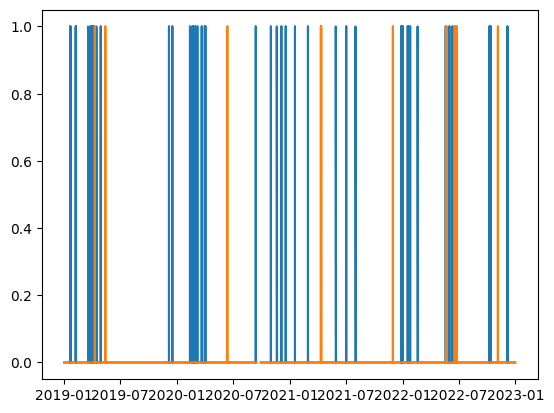

In [16]:

df['Tanggal'] = pd.to_datetime(df['Tanggal'])
plt.plot(df['Tanggal'], df[['B', 'RB']])

In [2]:
df = pd.read_csv('./data_bencana_semarang_clean/data_all_years.csv', dtype={'Bencana Alam': str})
df.drop(columns=['B', 'RB', 'TL', 'PT', 'KB'], inplace=True)

In [10]:
df = pd.read_csv('./data_bencana_semarang_clean/data_all_years.csv', dtype={'Bencana Alam': str})
df.drop(columns=['B', 'RB', 'TL', 'PT', 'KB'], inplace=True)

for bencana in df['Bencana Alam'].unique():
    count = len(df[df['Bencana Alam'] == bencana])
    print(f'{bencana} : {count}')

# for kecamatan in df['KECAMATAN'].unique():
#     df_kecamatan = df[df['KECAMATAN'] == kecamatan]
#     print(df_kecamatan)  
#     print("=============================")

00100 : 348
00000 : 22673
00001 : 66
00010 : 201
00011 : 4
10000 : 43
10010 : 1
10100 : 10
00101 : 10
01000 : 8
00111 : 1
00110 : 6
10110 : 1
10101 : 1
11000 : 3


In [11]:
print(df[df['Bencana Alam'] == '10000']['Tn'].max())
print(df[df['Bencana Alam'] == '10000']['Tx'].max())
print(df[df['Bencana Alam'] == '10000']['Tavg'].max())
print(df[df['Bencana Alam'] == '10000']['RH_avg'].max())
print(df[df['Bencana Alam'] == '10000']['RR'].max())
print(df[df['Bencana Alam'] == '10000']['ss'].max())
print(df[df['Bencana Alam'] == '10000']['ff_x'].max())
print(df[df['Bencana Alam'] == '10000']['ddd_x'].max())
print(df[df['Bencana Alam'] == '10000']['ff_avg'].max())
print(df[df['Bencana Alam'] == '10000']['ddd_car'].max())



27.0
35.2
29.3
92.0
121.2
11.0
8.0
360.0
3.0
W 


In [15]:
df[df['Bencana Alam'] == '10000']

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,KECAMATAN,Bencana Alam
305,2019-01-20,25.0,30.2,27.1,88.0,18.0,4.8,4.0,270.0,2.0,C,Tembalang,10000
604,2019-02-07,24.4,31.0,27.7,84.0,14.1,8.2,7.0,350.0,2.0,NW,Semarang Utara,10000
616,2019-02-08,24.0,30.6,26.4,88.0,53.1,6.8,5.0,340.0,2.0,C,Gunungpati,10000
1247,2019-03-19,24.4,30.8,26.5,87.0,10.5,6.0,5.0,20.0,2.0,E,Ngaliyan,10000
1433,2019-03-31,24.6,31.4,27.5,81.0,0.0,7.1,6.0,320.0,2.0,C,Gunungpati,10000
1475,2019-04-03,25.4,32.6,28.5,80.0,0.0,5.0,6.0,340.0,3.0,N,Tugu,10000
1541,2019-04-07,24.6,32.4,28.4,78.0,9.5,8.3,4.0,360.0,2.0,C,Gayamsari,10000
1679,2019-04-15,25.2,31.8,28.0,85.0,7.5,5.3,7.0,360.0,1.0,C,Ngaliyan,10000
1891,2019-04-29,25.4,31.0,27.1,87.0,7.0,1.6,6.0,360.0,2.0,S,Semarang Timur,10000
5427,2019-12-06,25.0,32.4,27.9,84.0,26.0,2.5,7.0,150.0,2.0,C,Gajah Mungkur,10000


In [13]:
def print_statistics(df, bencana_type='10000'):
    if bencana_type not in df['Bencana Alam'].unique():
        print("Bencana type not found in the data.")
        return

    columns = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
    print(f"Statistics for Bencana Type {bencana_type}:")
    for column in columns:
        df = df[df['KECAMATAN'] == 'Tembalang']
        column_data = df[df['Bencana Alam'] == bencana_type][column]
        print(f"{column}:")
        print(f"  Max: {column_data.max()}")
        print(f"  Min: {column_data.min()}")
        print(f"  Avg: {column_data.mean()}")

# Example usage:
print_statistics(df, bencana_type='10000')


Statistics for Bencana Type 10000:
Tn:
  Max: 25.0
  Min: 24.1
  Avg: 24.766666666666666
Tx:
  Max: 33.2
  Min: 30.2
  Avg: 31.633333333333333
Tavg:
  Max: 27.8
  Min: 26.8
  Avg: 27.34444444444445
RH_avg:
  Max: 88.0
  Min: 79.0
  Avg: 83.22222222222223
RR:
  Max: 36.9
  Min: 0.2
  Avg: 13.633333333333333
ss:
  Max: 9.7
  Min: 1.0
  Avg: 5.0
ff_x:
  Max: 8.0
  Min: 4.0
  Avg: 6.222222222222222
ddd_x:
  Max: 340.0
  Min: 10.0
  Avg: 255.55555555555554
ff_avg:
  Max: 3.0
  Min: 1.0
  Avg: 2.3333333333333335


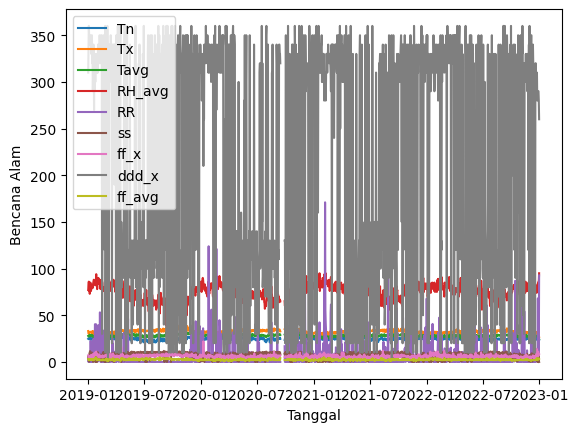

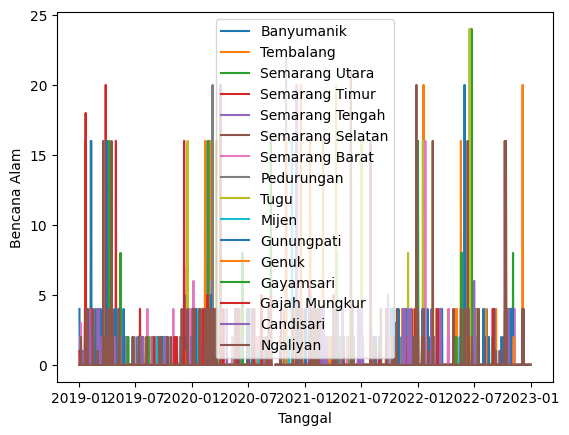

In [121]:
data = pd.read_csv('./data_bencana_semarang_clean/data_all_years.csv')
data['Tanggal'] = pd.to_datetime(data['Tanggal'])
plt.plot(data['Tanggal'], data[['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']], label= ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg'] )

plt.xlabel('Tanggal')
plt.ylabel('Bencana Alam')
plt.legend()
plt.show()


for kecamatan in data['KECAMATAN'].unique():
    df = pd.read_csv(f'./data_kecamatan_clean/data_{kecamatan}.csv')
    df['Tanggal'] = pd.to_datetime(df['Tanggal'])
    plt.plot(df['Tanggal'], df['Bencana Alam'], label = kecamatan)


plt.xlabel('Tanggal')
plt.ylabel('Bencana Alam')
plt.legend()
plt.show()

In [2]:
data_2020 = pd.read_csv('./data_bencana_semarang_clean/data_bmkg_2020.csv')

In [3]:
data_2020.isna().sum()

Tanggal    0
Tn         0
Tx         0
Tavg       0
RH_avg     0
RR         0
ss         0
ff_x       0
ddd_x      0
ff_avg     0
ddd_car    0
dtype: int64

In [4]:
data_2020.head(350)

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2020-01-01,24.4,31.8,27.1,86.0,14.0,3.5,6.0,310.0,2.0,NW
1,2020-01-02,24.0,31.8,27.3,82.0,15.1,3.3,5.0,310.0,2.0,NW
2,2020-01-03,24.0,32.6,28.5,75.0,2.7,4.0,6.0,310.0,3.0,NW
3,2020-01-04,23.8,30.6,27.1,85.0,32.8,5.9,7.0,280.0,2.0,W
4,2020-01-05,25.3,31.0,26.6,86.0,3.7,0.6,6.0,310.0,2.0,SW
...,...,...,...,...,...,...,...,...,...,...,...
345,2020-12-24,24.8,31.8,28.6,76.0,8.5,5.0,4.0,30.0,2.0,SE
346,2020-12-25,24.8,32.8,28.5,76.0,13.0,4.8,7.0,10.0,3.0,N
347,2020-12-26,25.0,31.5,28.3,78.0,2.3,8.6,5.0,330.0,2.0,C
348,2020-12-27,25.2,31.6,28.2,79.0,0.3,8.5,5.0,350.0,2.0,N
